# AI agent for playing DOOM

### VIZDOOM allows developing AI bots that play DOOM using visual information (the screen buffer). It is primarily intended for research in machine visual learning, and deep reinforcement learning, in particular.

### Step 1- Getting vizdoom working

In [10]:
!pip install vizdoom

In [11]:
#import vizddom for gaming env
from vizdoom import*
import random
import time

In [12]:
#setup game
game= DoomGame()
game.load_config('C:\\Users\\Lenovo\\Documents\\GitHub\\ViZDoom\\scenarios\\basic.cfg')
game.init()

This code sets up a VizDoom game environment for the user to interact with. VizDoom is a platform for reinforcement learning research with Doom, a popular first-person shooter video game.

The DoomGame() function initializes the game object, while load_config() loads the game configuration file (basic.cfg) from the specified location (github/VizDoom/scenarios/). This configuration file specifies various settings for the game, such as the layout of the game level, the available weapons, and the game's reward system.

Finally, init() initializes the game with the specified configuration and prepares it for gameplay.

In [13]:
import numpy as np

In [14]:
actions= np.identity(3, dtype=np.uint8) #set of actions we can take in env

This code creates an array of possible actions that the agent can take in the environment.

In this case, the array contains 3 possible actions, represented as a 3x3 identity matrix where the diagonal elements are 1 and all other elements are 0. The dtype=np.uint8 argument specifies that the array elements should be of unsigned 8-bit integer type.

Each row in the array represents an action that the agent can take. For example, if the agent wants to take the first action, it would select the first row in the array ([1, 0, 0]). Similarly, if it wants to take the second action, it would select the second row in the array ([0, 1, 0]), and so on.

In [15]:
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [16]:
random.choice(actions) # random actions taken

array([0, 0, 1], dtype=uint8)

In [17]:
#game.new_episode()

In [18]:
#game.is_episode_finished()

In [19]:
#game.make_action(random.choice(actions))

In [20]:
state = game.get_state()

This code retrieves the current state of the game environment.

The get_state() method is called on the game object, which is an instance of the DoomGame class that we initialized earlier. This method returns a GameState object that represents the current state of the game, including information such as the player's position, health, ammunition, and the state of the environment.

We can use the GameState object to extract information about the game state that we can use to make decisions about what actions to take. For example, we can extract the player's position to determine where the player is in the game world, or extract the state of the environment to determine the location of obstacles and enemies.

In [21]:
state.screen_buffer

array([[[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8)

This code retrieves the current screen buffer of the game state.

In VizDoom, the screen buffer is a numpy array that represents the current visual state of the game. It contains a sequence of pixels that represent the image of the game world as seen from the player's perspective.

The screen_buffer attribute is a property of the GameState object that we obtained earlier using the get_state() method. It is a numpy array of shape (height, width, channels) where height and width represent the dimensions of the game window, and channels represents the number of color channels in the image (typically 3 for RGB).

We can use the screen buffer to obtain visual information about the game world, such as the position of enemies or the location of power-ups. We can also use it to display the current state of the game to the user or to an AI agent that is learning to play the game.

In [22]:
state.game_variables

array([50.])

This code retrieves the values of the game variables in the current game state.

In VizDoom, game variables are used to represent dynamic aspects of the game state that can change over time, such as the player's health, ammunition, or score.

The game_variables attribute is a property of the GameState object that we obtained earlier using the get_state() method. It is a numpy array containing the current values of all the game variables defined in the game configuration file.

We can use the values of the game variables to determine the current state of the game and make decisions about what actions to take next. For example, if the player's health is low, the agent may decide to prioritize finding health packs or avoiding enemies to stay alive.

In [23]:
episodes= 10
for episode in range(episodes):
    game.new_episode()
    #check the game isn't done
    while not game.is_episode_finished():
        state= game.get_state()#getting the state
        img= state.screen_buffer#get image of the state
        info= state.game_variables #get the game variables- ammo
        reward= game.make_action(random.choice(actions),4)#taking random action, 4 is for frameskip means we skip 4 frames and then get to the result
        print('reward:',reward)
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: -229.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4

this code runs a simple random agent that takes random actions in the game environment and prints out the rewards received for each action and the total reward received for each episode. The purpose of this code is to test the game environment and ensure that it is running correctly.

In [24]:
game.close()

This code closes the VizDoom game instance, freeing up any resources used by the game.

When we are finished using the game environment, it is good practice to call game.close() to ensure that all resources associated with the game are properly released. This is especially important when running large-scale experiments or training deep learning models, as leaving game instances open can lead to memory leaks or other performance issues.

Closing the game instance will also terminate the Doom engine process and close any windows or graphics associated with the game

## Step 2- Converting into GYM environment

Converting the VizDoom game environment into a gym environment allows us to use the same set of APIs and interfaces that are provided by the OpenAI Gym library for other game environments. This makes it easier to write and test reinforcement learning algorithms that can be used with multiple game environments, as we can use the same code for training and evaluating our agents across different environments.
Converting the VizDoom environment to a Gym environment involves defining the observation space, action space, and reward function of the environment in terms of the Gym API. This makes it easy to use the environment with standard Gym tools and interfaces.

In [25]:
!pip install gym

In [26]:
!pip install opencv-python

In [27]:
#import env base class from open ai gym
from gym import Env

#import gym spaces
from gym.spaces import Discrete,Box #Spaces are crucially used in Gym to define the format of valid actions and observations
#They clearly define how to interact with environments, i.e. they specify what actions need to look like and what observations will look like
#They allow us to work with highly structured data (e.g. in the form of elements of Dict spaces) and painlessly transform them into flat arrays that can be used in learning code
#They provide a method to sample random elements. This is especially useful for exploration and debugging.

import cv2 #import opencv
#By using it, one can process images and videos to identify objects, faces, or even the handwriting of a human. When it integrated with various libraries, such as Numpy, python is capable of processing the OpenCV array structure for analysis

In [28]:
#Basic case
"""The purpose of the scenario is just to check if using this framework to train some AI in a 3D environment is feasible.

Map is a rectangle with gray walls, ceiling and floor. Player is spawned along the longer wall, in the center. A red, circular monster is spawned randomly somewhere along the opposite wall. Player can only (config) go left/right and shoot. 1 hit is enough to kill the monster. Episode finishes when monster is killed or on timeout.

REWARDS:

+101 for killing the monster -5 for missing Episode ends after killing the monster or on timeout.

Further configuration:

living reward = -1,
3 available buttons: move left, move right, shoot (attack)
timeout = 300"""
#create vizdoom openai gym environment
class VizDoomGym(Env):
    def __init__(self, render=False):#function that is called when we start env
        
        self.game= DoomGame()
        self.game.load_config('C:\\Users\\Lenovo\\Documents\\GitHub\\ViZDoom\\scenarios\\basic.cfg')
        
        #render form logic
        if render== False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        self.game.init()
        
        #create an action space and observation space
        self.observation_space= Box(low=0,high=255,shape=(100,160,1),  dtype=np.uint8)
        self.action_space= Discrete(3)
        
    def step(self,action):#how we take a step in env
        # Specif action and take step
        actions= np.identity(3)
        reward= self.game.make_action(actions[action],4)
        
        #get all the other stuff we need to return
        if self.game.get_state():
            state= self.game.get_state().screen_buffer
            state= self.grayscale(state)
            ammo= self.game.get_state().game_variables[0]
            info = ammo
        else:
            state= np.zeros(self.observation_space.shape)
            info=0
         
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state,reward,done,info
        
    def render():
        pass
    def reset(self): #hppens when start a new game
        self.game.new_episode()
        state= self.game.get_state().screen_buffer
        return self.grayscale(state)
        
        
    def grayscale(self,observation):
        gray= cv2.cvtColor(np.moveaxis(observation,0,-1),cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
        
    def close(self): #close the game
        self.game.close()

The code defines a custom OpenAI Gym environment for the VizDoom game. The environment is defined in a class called VizDoomGym, which inherits from the OpenAI Gym Env class.

__init__(self, render=False)-  is the constructor function that initializes the DoomGame object and sets up the action and observation spaces. Here's what each part does:

self.game = DoomGame() creates a DoomGame object.
self.game.load_config('C:\\Users\\Lenovo\\Documents\\GitHub\\ViZDoom\\scenarios\\basic.cfg') loads the configuration file for the game.
The render parameter is used to decide whether to show the game window or not.
If render is False, the game window is not shown.
self.observation_space is the observation space of the environment. It is set to a Box object with a low value of 0 and a high value of 255. 
The shape of the observation space is (100, 160, 1), which means that it is a grayscale image with a height of 100 pixels and a width of 160 pixels.

step(self, action)- is the function that takes a step in the environment. Here's what each part does:

actions = np.identity(3) creates an identity matrix of shape (3, 3). This is used to convert the action index into an actual action vector.
reward = self.game.make_action(actions[action], 4) takes a step in the game by executing the action corresponding to the action parameter.
if self.game.get_state(): checks if the game state exists. If it does, it retrieves the screen buffer and converts it to grayscale using the grayscale() function.
ammo = self.game.get_state().game_variables[0] retrieves the number of bullets the player has left from the game state.
info = ammo, sets the info variable to the number of bullets the player has left.
info = {"info": info} creates a dictionary containing the info variable.
done = self.game.is_episode_finished() checks if the episode is finished.
The function returns state, reward, done, and info.

grayscale(self, observation)- is a function that converts a color image to a grayscale image. Here's what each part does:

gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY) converts the color image to grayscale using OpenCV.
resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC) resizes the grayscale image to the desired size of (160, 100).
state = np.reshape(resize, (100, 160, 1)) reshapes the grayscale image to the desired shape of (100, 160, 1).
The function returns the reshaped grayscale image.

The reset() method is called to reset the environment and start a new episode. It initializes a new episode in the VizDoom game and returns the initial state of the game as the initial observation.

Finally, the close() method is called to close the VizDoom game when the environment is no longer needed.

In [29]:
#in the case of DEADLY CORRIDOR

#he purpose of this scenario is to teach the agent to navigate towards his fundamental goal (the vest) and make sure he survives at the same time.

#Map is a corridor with shooting monsters on both sides (6 monsters in total). A green vest is placed at the opposite end of the corridor. Reward is proportional (negative or positive) to change of the distance between the player and the vest. If player ignores monsters on the sides and runs straight for the vest he will be killed somewhere along the way. To ensure this behavior doom_skill = 5 (config) is needed.

#REWARDS:

#+dX for getting closer to the vest. -dX for getting further from the vest.

#Further configuration:

#5 available buttons: turn left, turn right, move left, move right, shoot (attack)
#timeout = 4200
#death penalty = 100
#doom_skill = 5


# Create Vizdoom OpenAI Gym Environment

"""class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False, config='github/VizDoom/scenarios/deadly_corridor_s1.cfg'): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config(config)
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(7)
        
        # Game variables: HEALTH DAMAGE_TAKEN HITCOUNT SELECTED_WEAPON_AMMO
        self.damage_taken = 0
        self.hitcount = 0
        self.ammo = 52 ## CHANGED
        
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(7)
        movement_reward = self.game.make_action(actions[action], 4) 
        
        reward = 0 
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            
            # Reward shaping
            game_variables = self.game.get_state().game_variables
            health, damage_taken, hitcount, ammo = game_variables
            
            # Calculate reward deltas
            damage_taken_delta = -damage_taken + self.damage_taken
            self.damage_taken = damage_taken
            hitcount_delta = hitcount - self.hitcount
            self.hitcount = hitcount
            ammo_delta = ammo - self.ammo
            self.ammo = ammo
            
            reward = movement_reward + damage_taken_delta*10 + hitcount_delta*200  + ammo_delta*5 
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment   
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()"""


'class VizDoomGym(Env): \n    # Function that is called when we start the env\n    def __init__(self, render=False, config=\'github/VizDoom/scenarios/deadly_corridor_s1.cfg\'): \n        # Inherit from Env\n        super().__init__()\n        # Setup the game \n        self.game = DoomGame()\n        self.game.load_config(config)\n        \n        # Render frame logic\n        if render == False: \n            self.game.set_window_visible(False)\n        else:\n            self.game.set_window_visible(True)\n        \n        # Start the game \n        self.game.init()\n        \n        # Create the action space and observation space\n        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) \n        self.action_space = Discrete(7)\n        \n        # Game variables: HEALTH DAMAGE_TAKEN HITCOUNT SELECTED_WEAPON_AMMO\n        self.damage_taken = 0\n        self.hitcount = 0\n        self.ammo = 52 ## CHANGED\n        \n        \n    # This is how we ta

This code defines a custom OpenAI Gym environment called VizDoomGym, which is based on the VizDoom game. The environment is designed to teach an agent to navigate through a corridor with shooting monsters on both sides, and to reach a green vest placed at the opposite end of the corridor while avoiding getting killed. The environment has 5 available buttons that the agent can use to turn left, turn right, move left, move right, or shoot (attack). The maximum duration of a game episode is set to 4200 steps, and the penalty for dying is 100. The doom_skill parameter is set to 5, which affects the difficulty level of the game.

This function is called when the environment is created. It initializes the DoomGame object and loads the scenario specified in the config parameter. It also sets up the game to either render or not depending on the value of render. It then creates the observation and action spaces, as well as initializes the values of damage_taken, hitcount, and ammo.

step(self, action): This function is called when an action is taken in the environment. It takes an action index as input and applies the corresponding action to the game. It then calculates the reward based on the change in game variables such as damage_taken, hitcount, and ammo, as well as the movement reward obtained from the game. Finally, it returns the new state, the reward, whether the episode is finished or not, and any additional information.

grayscale(self, observation): This function takes in a game frame observation and converts it to grayscale, resizes it to (160,100), and reshapes it to (100,160,1). This is done to reduce the size of the observation and make it easier to process.

In [30]:
#In the case of defend center
"""The purpose of this scenario is to teach the agent that killing the monsters is GOOD and when monsters kill you is BAD. In addition, wasting ammunition is not very good either. Agent is rewarded only for killing monsters so he has to figure out the rest for himself.

Map is a large circle. Player is spawned in the exact center. 5 melee-only, monsters are spawned along the wall. Monsters are killed after a single shot. After dying each monster is respawned after some time. Episode ends when the player dies (it's inevitable because of limited ammo).

REWARDS: +1 for killing a monster

Further configuration:

3 available buttons: turn left, turn right, shoot (attack)
death penalty = 1"""


"""# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('github/VizDoom/scenarios/defend_the_center.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()"""

'# Create Vizdoom OpenAI Gym Environment\nclass VizDoomGym(Env): \n    # Function that is called when we start the env\n    def __init__(self, render=False): \n        # Inherit from Env\n        super().__init__()\n        # Setup the game \n        self.game = DoomGame()\n        self.game.load_config(\'github/VizDoom/scenarios/defend_the_center.cfg\')\n        \n        # Render frame logic\n        if render == False: \n            self.game.set_window_visible(False)\n        else:\n            self.game.set_window_visible(True)\n        \n        # Start the game \n        self.game.init()\n        \n        # Create the action space and observation space\n        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) \n        self.action_space = Discrete(3)\n        \n    # This is how we take a step in the environment\n    def step(self, action):\n        # Specify action and take step \n        actions = np.identity(3)\n        reward = self.game.make

This code defines a VizDoom Gym environment for the "defend the center" scenario. The purpose of this scenario is to teach the agent that killing the monsters is good, getting killed is bad, and wasting ammunition is also not good. The agent is rewarded only for killing monsters.

overview of the differences between the three codes for basic, defend corridor and defend the center scenarios:

Basic Scenario: In this scenario, the player is in a simple room with a single monster that does not respawn. The player has to kill the monster to win the game. The player is rewarded for killing the monster and penalized for dying. The player has access to three actions: moving forward, turning left, and turning right.

Defend Corridor Scenario: In this scenario, the player is in a corridor and has to defend themselves from a series of monsters that spawn at the end of the corridor. The player has a limited amount of ammunition and is rewarded for killing monsters. The game ends when the player runs out of ammo or dies. The player has access to four actions: moving forward, turning left, turning right, and shooting.

Defend the Center Scenario: In this scenario, the player is in the center of a circular arena and is surrounded by monsters that respawn after they are killed. The player has a limited amount of ammunition and is rewarded for killing monsters. The game ends when the player dies. The player has access to three actions: turning left, turning right, and shooting.

The code for each scenario reflects these differences. For example, the VizDoomGym class for the Basic Scenario only has three available actions, while the VizDoomGym class for the Defend Corridor Scenario has four available actions, including shooting. Similarly, the reset() and step() methods in the VizDoomGym class are different for each scenario because of the different game mechanics and objectives.

In [31]:
env = VizDoomGym(render=True)

This code creates an instance of the VizDoomGym environment with the render argument set to True. This means that when the environment is run, the game screen will be displayed for visualization purposes.

In [32]:
state= env.reset()

env.reset() resets the environment and returns the initial state of the environment. In this case, it returns the initial grayscale state of the VizDoom game.

The state variable will contain a numpy array of shape (100,160,1) representing the grayscale screen buffer of the game. The screen buffer is a snapshot of the current state of the game that the agent can use as input to make decisions.

In [33]:
state

array([[[55],
        [50],
        [59],
        ...,
        [57],
        [57],
        [66]],

       [[68],
        [65],
        [65],
        ...,
        [56],
        [67],
        [72]],

       [[49],
        [79],
        [66],
        ...,
        [79],
        [51],
        [29]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [34]:
state.shape

(100, 160, 1)

In [35]:
np.moveaxis(state,0,-1).shape

(160, 1, 100)

In [36]:
env.step(2)

(array([[[55],
         [50],
         [59],
         ...,
         [57],
         [57],
         [66]],
 
        [[68],
         [65],
         [65],
         ...,
         [56],
         [67],
         [72]],
 
        [[49],
         [79],
         [66],
         ...,
         [79],
         [51],
         [29]],
 
        ...,
 
        [[75],
         [63],
         [62],
         ...,
         [44],
         [71],
         [60]],
 
        [[15],
         [48],
         [47],
         ...,
         [49],
         [69],
         [47]],
 
        [[22],
         [14],
         [26],
         ...,
         [57],
         [37],
         [39]]], dtype=uint8),
 -4.0,
 False,
 {'info': 50.0})

This code is calling the step() function of the VizDoomGym environment object env, with an action value of 2.

running env.step(2) will make the player shoot their weapon and update the environment state accordingly, returning information about the new state.

In [37]:
env.reset()

array([[[55],
        [50],
        [59],
        ...,
        [57],
        [57],
        [66]],

       [[68],
        [65],
        [65],
        ...,
        [56],
        [67],
        [72]],

       [[49],
        [79],
        [66],
        ...,
        [79],
        [51],
        [29]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [38]:
# Import Environment checker
from stable_baselines3.common import env_checker

it checks that the environment has an observation space and action space that are compatible with Stable Baselines and that the environment is compatible with multiprocessing.

In [39]:
env_checker.check_env(env)

env_checker.check_env(env) is checking whether the VizDoomGym environment is compatible with Stable Baselines.

## Step 3- View game state

In [40]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [41]:
!pip install matplotlib

In [42]:
from matplotlib import pyplot as plt

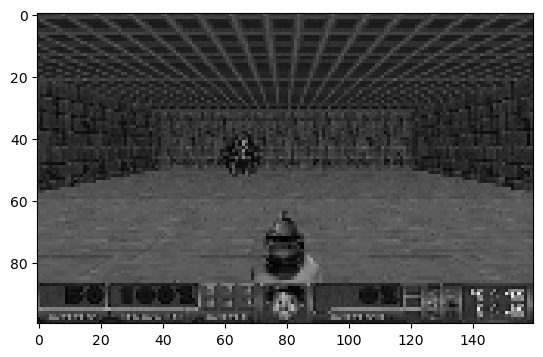

In [43]:
plt.imshow(cv2.cvtColor(state,cv2.COLOR_BGR2RGB))

In [44]:
env.close()

## Step 4- Setup callback

installing PyTorch allows you to use all of the available callbacks, which are powerful tools for monitoring the training of a reinforcement learning agent. Some of the available callbacks in Stable Baselines 3 include Tensorboard, Checkpoint, and CallbackList. By using these callbacks, you can visualize and save the training progress of your reinforcement learning agent.

In [45]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


With supervised learning, we can easily implement the cost function, run gradient descent on it, and be very confident that we’ll get excellent results with relatively little hyperparameter tuning. The route to success in reinforcement learning isn’t as obvious—the algorithms have many moving parts that are hard to debug, and they require substantial effort in tuning in order to get good results. PPO strikes a balance between ease of implementation, sample complexity, and ease of tuning, trying to compute an update at each step that minimizes the cost function while ensuring the deviation from the previous policy is relatively small.

In [46]:
pip install stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [47]:
import sys
print(sys.executable)

C:\Users\Lenovo\anaconda3\python.exe


In [48]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
ale-py                        0.7.4
anaconda-client               1.11.0
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
AutoROM                       0.6.1
AutoROM.accept-rom-license    0.6.1
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

In [49]:
#import calbacks class from sb3 
from stable_baselines3.common.callbacks import BaseCallback

In [50]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

This is a custom callback class TrainAndLoggingCallback that extends the BaseCallback class from the stable_baselines3 library. Callbacks are a way to customize the behavior of the reinforcement learning algorithm.

In this case, TrainAndLoggingCallback is used to save the model every check_freq steps during training, and to log training progress. The save_path parameter specifies the directory where the model checkpoints will be saved. If save_path is not None, the callback creates the directory if it doesn't exist.

In [51]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

These two variables are paths to the directories where the trained model checkpoints and logs will be saved, respectively.

CHECKPOINT_DIR points to the directory where the model checkpoints will be saved during training. A checkpoint is a snapshot of the model's current state that can be used to continue training later, or to load and evaluate the trained model at a later time.

LOG_DIR points to the directory where the logs generated during training will be saved. The logs include various metrics such as the training and evaluation episode rewards, number of steps taken, etc. that can be used to monitor the training progress and evaluate the performance of the trained model.

In [52]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

The TrainAndLoggingCallback is a custom callback that we have defined earlier to save the model at regular intervals during training and to log the training statistics using TensorBoard. The check_freq argument specifies how often we want to save the model (in terms of number of training steps), and the save_path argument specifies the directory where we want to save the model checkpoints.

We have set check_freq to 10,000, which means that we will save the model every 10,000 training steps. We have also specified CHECKPOINT_DIR as the directory where we want to save the checkpoints.

## Step 5- Train model 

In [53]:
# import ppo for training
from stable_baselines3 import PPO

We imported PPO algorithm from stable_baselines3, which we will use to train the agent on the Doom environment

PPO (Proximal Policy Optimization) is a popular reinforcement learning algorithm that has shown good performance on a variety of tasks. It is known for its stability and sample efficiency, which makes it a good choice for training agents in complex environments. It is an on-policy algorithm, which means that it learns the optimal policy by repeatedly sampling the current policy and improving it in an iterative fashion. PPO also uses a clipping mechanism to ensure that the policy update stays within a certain range, which helps to prevent the policy from changing too much at once and destabilizing the learning process.

Simple Q-learning is a model-free, off-policy, temporal-difference algorithm that learns to estimate the optimal action-value function by using a table to store the value of each state-action pair. However, Q-learning can be limited in its ability to handle high-dimensional or continuous state spaces, and it can be computationally expensive to store and update a table of values for each state-action pair.

On the other hand, PPO (Proximal Policy Optimization) is a model-free, on-policy, actor-critic algorithm that can handle high-dimensional and continuous state spaces through the use of neural networks. PPO is also designed to be more sample-efficient than other policy gradient methods and can learn directly from raw sensory input, making it a good choice for training agents in complex environments like video games.

In [54]:
# Non rendered environment
env = VizDoomGym()

creating a non-rendered environment without visualization can be useful for training RL agents when you don't need to see the agent's actions in the environment.

Also, the non-rendered environment can be faster because it does not need to process and display images on the screen.

In [55]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


This code initializes a new PPO agent with a convolutional neural network policy (CnnPolicy), using the VizDoomGym environment we defined earlier as the training environment.

The tensorboard_log argument specifies the directory where TensorBoard logs will be saved for visualization purposes.

The verbose argument sets the level of output printed to the console during training. A value of 1 means that progress will be printed every 10,000 steps.

The learning_rate argument sets the learning rate used by the optimizer during training. A value of 0.0001 is a commonly used value.

The n_steps argument determines the number of steps to take between updates to the policy. A value of 2048 is a commonly used value.

In [56]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | -41.8    |
| time/              |          |
|    fps             | 58       |
|    iterations      | 1        |
|    time_elapsed    | 34       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 28.7         |
|    ep_rew_mean          | -60.2        |
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 2            |
|    time_elapsed         | 112          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0024942823 |
|    clip_fraction        | 0.0998       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance 

This will start the training process of the PPO model for 100000 timesteps with the TrainAndLoggingCallback callback function that we have defined earlier. During the training process, the callback function will be called every 10000 timesteps to save the best model at that point in the CHECKPOINT_DIR directory, and also to log the training progress to the LOG_DIR directory using TensorBoard.

## Step 6- Test the model

In [57]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [58]:
# Reload model from disc
model = PPO.load('./train/train_basic/best_model_60000')

In [59]:
# Create rendered environment
env = VizDoomGym(render=True)

we first created a non-rendered environment to train our agent, since rendering the screen is not necessary during the training process. Later, we created a rendered environment to evaluate the performance of our trained agent in a visually appealing way.

In [60]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

C:\Users\Lenovo\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


This code is evaluating the performance of the trained model on the VizDoom environment. Specifically, it is using the evaluate_policy function from Stable Baselines 3 library to calculate the mean reward obtained by the model over 100 episodes of the game. The model argument is the trained PPO model that we loaded from disk, the env argument is the VizDoom environment instance that we created with rendering enabled, and the n_eval_episodes argument specifies the number of evaluation episodes to run.

The evaluate_policy function returns the mean reward obtained by the model and a dictionary containing additional evaluation metrics, but in this code, we only capture the mean reward value in the mean_reward variable.

In [61]:
mean_reward

83.78

model.predict(obs) is used to predict the action to take given the current observation of the environment. It takes the observation of the environment as input and returns the predicted action as output. The action returned is based on the policy learned by the agent during training.

In [63]:
for episode in range(100): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

Total Reward for episode 87.0 is 0
Total Reward for episode 95.0 is 1
Total Reward for episode 68.0 is 2
Total Reward for episode 95.0 is 3
Total Reward for episode 19.0 is 4
Total Reward for episode 71.0 is 5
Total Reward for episode 95.0 is 6
Total Reward for episode 52.0 is 7
Total Reward for episode 95.0 is 8
Total Reward for episode 95.0 is 9
Total Reward for episode 95.0 is 10
Total Reward for episode 95.0 is 11
Total Reward for episode 95.0 is 12
Total Reward for episode 95.0 is 13
Total Reward for episode 95.0 is 14
Total Reward for episode 95.0 is 15
Total Reward for episode 95.0 is 16
Total Reward for episode 95.0 is 17
Total Reward for episode 95.0 is 18
Total Reward for episode 95.0 is 19
Total Reward for episode 75.0 is 20
Total Reward for episode 95.0 is 21
Total Reward for episode 75.0 is 22
Total Reward for episode 95.0 is 23
Total Reward for episode 67.0 is 24
Total Reward for episode 79.0 is 25
Total Reward for episode 95.0 is 26
Total Reward for episode 95.0 is 27
To

This code snippet is running 100 episodes of the game with the trained PPO model, where in each episode, the agent takes actions in the environment until it reaches a terminal state (done=True), and the total reward accumulated during that episode is printed. The time.sleep(2) function call between each episode adds a pause of 2 seconds between each episode for easier visualization of the gameplay.

In [64]:
model.predict(obs)

(array(1, dtype=int64), None)

# 